# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [207]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [208]:
# Your code here - Manipulate column names
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10+', 'ages_10-14',
       'ages_10-16', 'ages_10-21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very Challenging',
       'review_difficulty_Very Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [209]:
# Your code here - Define the target and predictors
subs = [(' ', '_'), ('.',''), ("'", ""), ('™', ''), ('®', ''), ('+', 'plus'), ('1/2', 'half'), ('-', '_'), ('½', 'half')]

def col_formatting(col):
    for old, new in subs:
        col = col.replace(old, new)
    return col 

In [210]:
df.columns = [col_formatting(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [212]:
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [213]:
# Your code here - Split into train and test
train, test = train_test_split(df)
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
9861,-0.455886,17.7429,0.662745,0.216064,0.368848,0.922564,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7858,-0.316330,36.5878,0.243828,-0.481010,-0.045687,-0.204063,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1956,-0.572583,24.3878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2850,-0.502805,23.3922,-0.119234,0.041796,-0.045687,0.278777,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7075,-0.294675,54.8878,-0.314729,0.738870,-0.667489,-1.008797,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [214]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     543.8
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:16:47   Log-Likelihood:                -40563.
No. Observations:                8152   AIC:                         8.132e+04
Df Residuals:                    8057   BIC:                         8.198e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.9631      1.998     31.519      0.000      59.047      66.879
piece_count                                         75.9353      0.904     84.009      0.000      74.163      77.707
num_reviews                                          6.7208      0.693      9.698      0.000       5.362       8.079
play_star_rating                                     5.2585      0.627      8.387      0.000       4.029       6.488
star_rating                                         -0.7453      0.718     -1.037      0.300      -2.154       0.663
val_star_rating                                     -9.1008      0.643    -14.150      0.000     -10.362      -7.840
ages_10plus                                        124.0870      6.764     18.344      0.000     110.827     137.347
ages_10_14                                         -23.5644      8.767     -2.688      0.007     -40.751      -6.378
ages_10_16                                         -11.0146      4.138     -2.662      0.008     -19.127      -2.903
ages_10_21                                          55.7786      7.615      7.325      0.000      40.852      70.705
ages_11_16                                         -18.1362      5.848     -3.101      0.002     -29.600      -6.672
ages_12plus                                         66.9491      5.503     12.166      0.000      56.162      77.736
ages_12_16                                         -59.7437      6.867     -8.700      0.000     -73.206     -46.282
ages_14plus                                         27.4816      4.268      6.439      0.000      19.115      35.848
ages_16plus                                         24.6502      6.032      4.087      0.000      12.826      36.474
ages_1half_3                                        -8.7060      2.407     -3.617      0.000     -13.424      -3.988
ages_1half_5                                        -3.8037      2.965     -1.283      0.200      -9.616       2.009
ages_2_5                                            14.4405      1.680      8.596      0.000      11.147      17.734
ages_4plus                                         -19.6861      6.724     -2.928      0.003     -32.867      -6.505
ages_4_7                                            -5.8144      3.660     -1.589      0.112     -12.989       1.360
ages_4_99                                           -2.0667      3.798     -0.544      0.586      -9.511       5.377
ages_5plus                                          -9.7069      3.218     -3.017      0.003     -16.014      -3.399
ages_5_12                                          -33.2885      3.287    -10.128      0.000     -39.732     -26.845
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [215]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0) 
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 71
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,62.9631,1.998,31.519,0.0,59.047,66.879
piece_count,75.9353,0.904,84.009,0.0,74.163,77.707
num_reviews,6.7208,0.693,9.698,0.0,5.362,8.079
play_star_rating,5.2585,0.627,8.387,0.0,4.029,6.488
star_rating,-0.7453,0.718,-1.037,0.3,-2.154,0.663


In [216]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     730.2
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:16:48   Log-Likelihood:                -40573.
No. Observations:                8152   AIC:                         8.129e+04
Df Residuals:                    8081   BIC:                         8.179e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.4045      2.115     29.506      0.000      58.259      66.550
piece_count                                         76.1093      0.884     86.057      0.000      74.376      77.843
num_reviews                                          6.6389      0.670      9.908      0.000       5.325       7.952
play_star_rating                                     4.9791      0.525      9.484      0.000       3.950       6.008
val_star_rating                                     -9.3444      0.497    -18.790      0.000     -10.319      -8.370
ages_10plus                                        119.8915      4.979     24.079      0.000     110.131     129.652
ages_10_14                                         -18.8779      9.065     -2.083      0.037     -36.648      -1.108
ages_10_16                                          -6.9296      3.904     -1.775      0.076     -14.582       0.723
ages_10_21                                          48.7231      3.291     14.804      0.000      42.272      55.175
ages_11_16                                         -14.1210      5.602     -2.521      0.012     -25.103      -3.139
ages_12plus                                         68.3181      5.937     11.507      0.000      56.680      79.956
ages_12_16                                         -55.4938      7.152     -7.759      0.000     -69.514     -41.473
ages_14plus                                         32.4229      4.596      7.055      0.000      23.414      41.431
ages_16plus                                         27.9217      6.651      4.198      0.000      14.884      40.959
ages_1half_3                                        -1.5781      3.128     -0.504      0.614      -7.710       4.554
ages_2_5                                            21.1056      1.980     10.661      0.000      17.225      24.986
ages_4plus                                         -17.6718     10.271     -1.721      0.085     -37.806       2.462
ages_5plus                                          -7.3454      3.219     -2.282      0.023     -13.656      -1.035
ages_5_12                                          -27.9874      2.712    -10.321      0.000     -33.303     -22.672
ages_6plus                                         -21.9215      5.659     -3.874      0.000     -33.015     -10.828
ages_6_12                                          -16.1048      1.888     -8.529      0.000     -19.806     -12.403
ages_7_12                                          -14.9881      2.259     -6.634      0.000     -19.417     -10.560
ages_7_14                                          -11.5288      2.001     -5.763      0.000     -15.450      -7.607
ages_8plus                               

In [217]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

72 63
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,62.4045,2.115,29.506,0.0,58.259,66.550
piece_count,76.1093,0.884,86.057,0.0,74.376,77.843
num_reviews,6.6389,0.670,9.908,0.0,5.325,7.952
play_star_rating,4.9791,0.525,9.484,0.0,3.950,6.008
val_star_rating,-9.3444,0.497,-18.790,0.0,-10.319,-8.370


> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [218]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     823.6
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:16:48   Log-Likelihood:                -40580.
No. Observations:                8152   AIC:                         8.129e+04
Df Residuals:                    8089   BIC:                         8.173e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6309      1.298     49.005      0.000      61.086      66.176
piece_count                                         75.8397      0.860     88.227      0.000      74.155      77.525
num_reviews                                          6.1904      0.636      9.740      0.000       4.944       7.436
play_star_rating                                     5.1203      0.519      9.859      0.000       4.102       6.138
val_star_rating                                     -9.4607      0.492    -19.247      0.000     -10.424      -8.497
ages_10plus                                        121.1667      4.898     24.737      0.000     111.565     130.769
ages_10_14                                         -17.0080      8.993     -1.891      0.059     -34.637       0.621
ages_10_21                                          49.1413      3.217     15.275      0.000      42.835      55.448
ages_11_16                                         -11.4812      5.445     -2.108      0.035     -22.155      -0.807
ages_12plus                                         70.4544      5.794     12.159      0.000      59.096      81.813
ages_12_16                                         -52.1632      6.971     -7.483      0.000     -65.828     -38.498
ages_14plus                                         35.6925      4.331      8.242      0.000      27.204      44.182
ages_16plus                                         32.2872      6.326      5.104      0.000      19.886      44.688
ages_2_5                                            21.8790      1.848     11.841      0.000      18.257      25.501
ages_5plus                                          -7.6591      3.126     -2.450      0.014     -13.786      -1.532
ages_5_12                                          -27.1186      2.627    -10.325      0.000     -32.267     -21.970
ages_6plus                                         -20.4993      5.599     -3.661      0.000     -31.474      -9.524
ages_6_12                                          -14.7091      1.706     -8.623      0.000     -18.053     -11.365
ages_7_12                                          -13.2509      2.083     -6.361      0.000     -17.334      -9.168
ages_7_14                                          -10.0321      1.831     -5.480      0.000     -13.621      -6.444
ages_8plus                                          16.2536      4.488      3.621      0.000       7.455      25.052
ages_8_12                                          -13.5438      2.622     -5.166      0.000     -18.683      -8.405
ages_8_14                                           -9.1319      1.927     -4.738      0.000     -12.910      -5.354
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [219]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('piece_count', 4.432975725597809),
 ('num_reviews', 2.4993105060690364),
 ('play_star_rating', 1.7739046256721878),
 ('val_star_rating', 1.5897482485800125),
 ('ages_10plus', 7.1397559632542515),
 ('ages_10_14', 1.094640163455838),
 ('ages_10_21', 1.0548232759742373),
 ('ages_11_16', 1.144338566437056),
 ('ages_12plus', 6.1392388477275555),
 ('ages_12_16', 1.180579403701934),
 ('ages_14plus', 1.8586956422021126),
 ('ages_16plus', 9.036344347872722),
 ('ages_2_5', 1.1965124881639568),
 ('ages_5plus', inf),
 ('ages_5_12', 3.2269678887288684),
 ('ages_6plus', 2.665100675617297),
 ('ages_6_12', 1.9187723342164602),
 ('ages_7_12', 1.4735575476218938),
 ('ages_7_14', 1.9366365570866522),
 ('ages_8plus', 2.583963412973387),
 ('ages_8_12', 1.2608432963383354),
 ('ages_8_14', 1.9741928284421546),
 ('ages_9plus', 1.404217108271279),
 ('ages_9_12', 1.0188693666425521),
 ('ages_9_14', 1.8485208685764989),
 ('theme_name_Architecture', 5.196593435680532),
 ('theme_name_BOOST', 1.059047207588622),


## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [220]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x, vif in vif_scores if vif <5]
print(len(vif_scores), len(x_cols))

63 56


In [221]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     828.2
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:16:53   Log-Likelihood:                -40919.
No. Observations:                8152   AIC:                         8.195e+04
Df Residuals:                    8095   BIC:                         8.235e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.6138      1.118     58.690      0.000      63.422      67.805
piece_count                                         77.4580      0.691    112.028      0.000      76.103      78.813
num_reviews                                          4.4952      0.617      7.290      0.000       3.286       5.704
play_star_rating                                     6.0548      0.491     12.329      0.000       5.092       7.017
val_star_rating                                    -10.9740      0.491    -22.343      0.000     -11.937     -10.011
ages_10_14                                         -32.6851      9.313     -3.510      0.000     -50.940     -14.430
ages_10_21                                          46.6249      3.304     14.110      0.000      40.147      53.102
ages_11_16                                         -21.1291      5.362     -3.941      0.000     -31.640     -10.619
ages_12_16                                         -64.1356      6.857     -9.353      0.000     -77.578     -50.693
ages_14plus                                         15.9712      3.771      4.236      0.000       8.580      23.363
ages_2_5                                            20.0909      1.815     11.069      0.000      16.533      23.649
ages_5_12                                          -30.2887      2.663    -11.372      0.000     -35.510     -25.068
ages_6plus                                         -24.0313      5.795     -4.147      0.000     -35.390     -12.672
ages_6_12                                          -19.2714      1.643    -11.732      0.000     -22.492     -16.051
ages_7_12                                          -16.8346      2.065     -8.154      0.000     -20.882     -12.787
ages_7_14                                          -14.0828      1.800     -7.825      0.000     -17.611     -10.555
ages_8plus                                           2.7848      4.531      0.615      0.539      -6.098      11.668
ages_8_12                                          -17.3769      2.588     -6.713      0.000     -22.451     -12.303
ages_8_14                                          -15.0053      1.870     -8.024      0.000     -18.671     -11.339
ages_9plus                                          19.5227     10.180      1.918      0.055      -0.432      39.478
ages_9_12                                          -28.1504      6.831     -4.121      0.000     -41.540     -14.761
ages_9_14                                          -14.3637      2.532     -5.673      0.000     -19.327      -9.400
theme_name_BOOST                                    87.9736     10.090      8.719      0.000      68.194     107.753
theme_name_Blues_Helicopter_Pursuit      

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

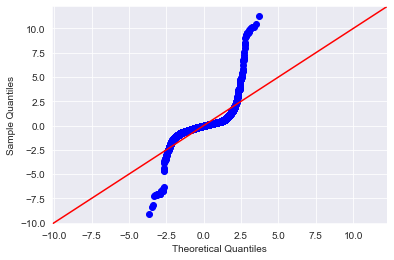

In [222]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

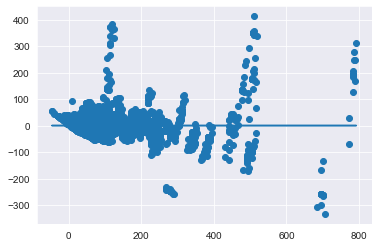

In [223]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

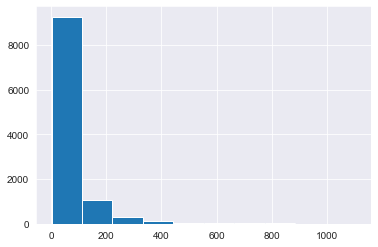

In [224]:
df.list_price.hist()

In [225]:
# Your code here - Check for outliers
for i in range (90,100):
    q = i/100
    print('{} percentile: {}'.format(q, df.list_price.quantile(q=q)))

0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [226]:
# Your code here
# Remove extreme outliers
df = df[df['list_price'] < 350]
print('Percent removed:' , (len(df) - len(subset))/ len(df))
df.list_price = df.list_price.map(np.log)
train, test = train_test_split(df)


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula = formula, data=train).fit()
model.summary()

# Rerun the model

Percent removed: 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     462.3
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:17:01   Log-Likelihood:                -4500.1
No. Observations:                7982   AIC:                             9114.
Df Residuals:                    7925   BIC:                             9512.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4492      0.014    249.313      0.000       3.422       3.476
piece_count                                          0.7980      0.013     63.288      0.000       0.773       0.823
num_reviews                                         -0.0278      0.008     -3.536      0.000      -0.043      -0.012
play_star_rating                                     0.0958      0.006     16.588      0.000       0.084       0.107
val_star_rating                                     -0.1466      0.006    -25.129      0.000      -0.158      -0.135
ages_10_14                                           0.3934      0.119      3.316      0.001       0.161       0.626
ages_10_21                                           0.7478      0.038     19.663      0.000       0.673       0.822
ages_11_16                                          -0.0883      0.070     -1.269      0.205      -0.225       0.048
ages_12_16                                          -0.5108      0.084     -6.109      0.000      -0.675      -0.347
ages_14plus                                          0.1912      0.051      3.741      0.000       0.091       0.291
ages_2_5                                             0.5222      0.021     24.417      0.000       0.480       0.564
ages_5_12                                           -0.6761      0.031    -21.782      0.000      -0.737      -0.615
ages_6plus                                          -0.9109      0.065    -14.031      0.000      -1.038      -0.784
ages_6_12                                           -0.1383      0.019     -7.145      0.000      -0.176      -0.100
ages_7_12                                            0.1217      0.024      5.137      0.000       0.075       0.168
ages_7_14                                            0.0280      0.021      1.345      0.179      -0.013       0.069
ages_8plus                                           0.6408      0.054     11.798      0.000       0.534       0.747
ages_8_12                                            0.2333      0.031      7.560      0.000       0.173       0.294
ages_8_14                                            0.3168      0.022     14.144      0.000       0.273       0.361
ages_9plus                                           0.2039      0.119      1.714      0.087      -0.029       0.437
ages_9_12                                            0.3176      0.073      4.366      0.000       0.175       0.460
ages_9_14                                            0.3561      0.031     11.360      0.000       0.295       0.418
theme_name_BOOST                                     0.9676      0.122      7.958      0.000       0.729       1.206
theme_name_Blues_Helicopter_Pursuit      

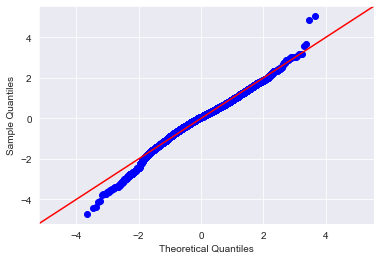

In [227]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line = '45', fit=True)

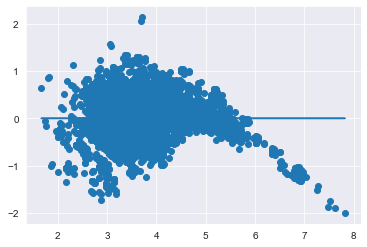

In [233]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 